In [120]:
from IPython.display import Markdown, display

import pandas as pd
import numpy as np

SEED = 42
np.random.seed(SEED)
rng = np.random.default_rng(SEED)

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

from sklearn import set_config
set_config(transform_output="pandas")

from pathlib import Path
data_path = Path('./data')

from process import *



19:57:11 DEBUG Loaded backend inline version unknown.


In [121]:
train = pd.read_csv(data_path / "train.csv").drop("Id", axis=1)
test_orig = pd.read_csv(data_path / "test.csv")
test = test_orig.copy().drop("Id", axis=1)
# test["SalePrice"] = np.nan

In [122]:
train.MSZoning.value_counts(dropna=False), test.MSZoning.value_counts(dropna=False)

(MSZoning
 RL         1151
 RM          218
 FV           65
 RH           16
 C (all)      10
 Name: count, dtype: int64,
 MSZoning
 RL         1114
 RM          242
 FV           74
 C (all)      15
 RH           10
 NaN           4
 Name: count, dtype: int64)

In [123]:
train["SalePrice"]

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [124]:
train["Alley"] = train["Alley"].fillna("None")
test["Alley"] = test["Alley"].fillna("None")
proc = DataProcessor(train)
X, y = train.drop("SalePrice", axis=1), train["SalePrice"]
X = proc.fit_transform(X, y)
train = X.join(y)

19:57:12 DEBUG Initialization Complete


19:57:12 DEBUG FIT Columns: 79, Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'Garag

[Pipeline] . (step 1 of 7) Processing missing_indicator, total=   0.0s
[Pipeline] ...... (step 2 of 7) Processing none_imputer, total=   0.0s
[Pipeline] ..... (step 3 of 7) Processing other_imputer, total=   0.0s


Debugging: None
Debug Shape: (1460, 82)

Debug nans: 
LotFrontage    259
GarageYrBlt     81
MasVnrArea       8
MSSubClass       0
KitchenQual      0
dtype: int64
[Pipeline] ............. (step 4 of 7) Processing debug, total=   0.0s
[Pipeline] ...... (step 5 of 7) Processing zero_imputer, total=   0.0s
[Pipeline]  (step 6 of 7) Processing catch_all_mean_imputer, total=   0.0s
[Pipeline]  (step 7 of 7) Processing catch_all_missing_imputer, total=   0.0s
[Pipeline] .......... (step 1 of 11) Processing imputer, total=   0.1s


Debugging: Imputer
Debug Shape: (1460, 82)

Debug nans: 
MSSubClass      0
GarageArea      0
GarageFinish    0
GarageYrBlt     0
GarageType      0
dtype: int64
[Pipeline] .... (step 2 of 11) Processing debug_imputer, total=   0.0s
[Pipeline]  (step 1 of 1

19:57:31 INFO Preprocessing Categorical Features


[Pipeline] ............ (step 1 of 2) Processing onehot, total=   0.2s
[Pipeline] ............ (step 2 of 2) Processing scaler, total=   0.0s
[Pipeline] ......... (step 11 of 11) Processing encoder, total=   0.2s


Debugging: None
Debug Shape: (1460, 82)

Debug nans: 
LotFrontage    259
GarageYrBlt     81
MasVnrArea       8
MSSubClass       0
KitchenQual      0
dtype: int64


Debugging: Imputer
Debug Shape: (1460, 82)

Debug nans: 
MSSubClass      0
GarageArea      0
GarageFinish    0
GarageYrBlt     0
GarageType      0
dtype: int64


Debugging: Categorical
Debug Shape: (1460, 83)

Debug nans: 
MSSubClass    0
PavedDrive    0
GarageQual    0
GarageArea    0
GarageCars    0
dtype: int64


Debugging: Feature Selector
Debug Shape: (1460, 48)

Debug nans: 
MSZoning        0
Alley           0
BsmtFinType2    0
Heating         0
HeatingQC       0
dtype: int64


Debugging: Match Variables
Debug Shape: (1460, 48)

Debug nans: 
MSZoning        0
Alley           0
BsmtFinType2    0
Heating      

In [125]:
train

,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,2ndFlrSF,GrLivArea,MSZoning_RL,MSZoning_RM,MSZoning_C (all),...,SaleCondition_AdjLand,SaleCondition_Alloca,NearHighVolStreet_None,NearHighVolStreet_Feedr,NearPosFeature_Normal,NearRailRoad_None,NearRailRoad_RRAe,NearRailRoad_RRNn,NearRailRoad_RRAn,SalePrice
0,7,5,0.229943,0.302237,0.046485,0.245524,0.036650,0.211644,-0.149315,-0.006849,...,-0.00274,-0.008219,0.091781,-0.058904,0.019178,0.032877,-0.008219,-0.004795,-0.018493,208500
1,6,8,0.034291,-0.147763,0.094678,-0.168035,-0.047751,0.211644,-0.149315,-0.006849,...,-0.00274,-0.008219,-0.908219,0.941096,0.019178,0.032877,-0.008219,-0.004795,-0.018493,181500
2,7,5,0.215451,0.285571,0.007505,0.251335,0.050968,0.211644,-0.149315,-0.006849,...,-0.00274,-0.008219,0.091781,-0.058904,0.019178,0.032877,-0.008219,-0.004795,-0.018493,223500
3,7,5,-0.407738,-0.247763,-0.040333,0.198067,0.037968,0.211644,-0.149315,-0.006849,...,-0.00274,-0.008219,0.091781,-0.058904,0.019178,0.032877,-0.008219,-0.004795,-0.018493,140000
4,8,5,0.208204,0.252237,0.037449,0.341892,0.128586,0.211644,-0.149315,-0.006849,...,-0.00274,-0.008219,0.091781,-0.058904,0.019178,0.032877,-0.008219,-0.004795,-0.018493,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,5,0.200958,0.252237,-0.078604,0.168042,0.024781,0.211644,-0.149315,-0.006849,...,-0.00274,-0.008219,0.091781,-0.058904,0.019178,0.032877,-0.008219,-0.004795,-0.018493,175000
1456,6,6,0.048784,0.052237,0.061368,-0.168035,0.105037,0.211644,-0.149315,-0.006849,...,-0.00274,-0.008219,0.091781,-0.058904,0.019178,0.032877,-0.008219,-0.004795,-0.018493,210000
1457,7,9,-0.219332,0.352237,-0.029879,0.389834,0.155338,0.211644,-0.149315,-0.006849,...,-0.00274,-0.008219,0.091781,-0.058904,0.019178,0.032877,-0.008219,-0.004795,-0.018493,266500
1458,5,6,-0.154115,0.185571,-0.069922,-0.168035,-0.082416,0.211644,-0.149315,-0.006849,...,-0.00274,-0.008219,0.091781,-0.058904,0.019178,0.032877,-0.008219,-0.004795,-0.018493,142125


In [126]:
test = proc.transform(test)

19:57:31 DEBUG TRANSFORM Columns: 79, Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 

19:57:31 INFO Preprocessing Categorical Features
/home/frank/miniforge3/envs/pycaret/lib/python3.10/site-packages/feature_engine/preprocessing/match_categories.py:192: UserWarning: During the encoding, NaN values were introduced in the feature(s) MSZoning, Exterior1st, Exterior2nd, KitchenQual, Functional, SaleType.
  warnings.warn(




Debugging: None
Debug Shape: (1459, 82)

Debug nans: 
LotFrontage     227
GarageYrBlt      78
MasVnrArea       15
MSZoning          4
BsmtHalfBath      2
dtype: int64


Debugging: Imputer
Debug Shape: (1459, 82)

Debug nans: 
MSSubClass      0
GarageArea      0
GarageFinish    0
GarageYrBlt     0
GarageType      0
dtype: int64


Debugging: Categorical
Debug Shape: (1459, 83)

Debug nans: 
MSSubClass    0
PavedDrive    0
GarageQual    0
GarageArea    0
GarageCars    0
dtype: int64


Debugging: Feature Selector
Debug Shape: (1459, 48)

Debug nans: 
MSZoning        0
Alley           0
BsmtFinType2    0
Heating         0
HeatingQC       0
dtype: int64


Debugging: Match Variables
Debug Shape: (1459, 48)

Debug nans: 
MSZoning        0
Alley           0
BsmtFinType2    0
Heating         0
HeatingQC       0
dtype: int64


In [127]:
train.LotFrontage

AttributeError: 'DataFrame' object has no attribute 'LotFrontage'

In [8]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
YearBuilt,1460.0,2.320822e-16,0.218862,-0.719332,-0.125129,0.012552,0.208204,0.280668
YearRemodAdd,1460.0,1.546404e-15,0.344090,-0.581096,-0.297763,0.152237,0.318904,0.418904
BsmtFinSF1,1460.0,-3.650048e-18,0.080811,-0.078604,-0.078604,-0.010656,0.047592,0.921396
2ndFlrSF,1460.0,3.497963e-18,0.211394,-0.168035,-0.168035,-0.168035,0.184507,0.831965
GrLivArea,1460.0,-1.383977e-17,0.098998,-0.222582,-0.072714,-0.009695,0.049225,0.777418
...,...,...,...,...,...,...,...,...
NearRailRoad_None,1460.0,-2.555034e-17,0.178375,-0.967123,0.032877,0.032877,0.032877,0.032877
NearRailRoad_RRAe,1460.0,3.497963e-18,0.090317,-0.008219,-0.008219,-0.008219,-0.008219,0.991781
NearRailRoad_RRNn,1460.0,1.064597e-18,0.069100,-0.004795,-0.004795,-0.004795,-0.004795,0.995205
NearRailRoad_RRAn,1460.0,-5.931328e-18,0.134772,-0.018493,-0.018493,-0.018493,-0.018493,0.981507


In [9]:
# perform 2 sample ks test between train and test data
from scipy.stats import ks_2samp

ks_results = []
for col in test.columns:
    ks_stat, p_value = ks_2samp(train[col], test[col])
    ks_results.append((col, ks_stat, p_value))

ks_results = pd.DataFrame(ks_results, columns=["column", "ks_stat", "p_value"])
ks_results["different_05"] = ks_results["p_value"] < 0.05
ks_results["different_10"] = ks_results["p_value"] < 0.10
ks_results

,column,ks_stat,p_value,different_05,different_10
0,OverallQual,0.022185,0.853617,False,False
1,OverallCond,0.015624,0.992307,False,False
2,YearBuilt,0.015183,0.994752,False,False
3,YearRemodAdd,0.037196,0.257689,False,False
4,BsmtFinSF1,0.027048,0.644777,False,False
...,...,...,...,...,...
213,NearPosFeature_Normal,0.002755,1.000000,False,False
214,NearRailRoad_None,0.000708,1.000000,False,False
215,NearRailRoad_RRAe,0.003433,1.000000,False,False
216,NearRailRoad_RRNn,0.002053,1.000000,False,False


In [10]:
ks_results[ks_results["different_10"]]

,column,ks_stat,p_value,different_05,different_10
5,2ndFlrSF,0.047094,0.073708,False,True
6,GrLivArea,0.046370,0.081657,False,True


In [11]:
# missing values in PoolQC, we can fill with None
# display(train.PoolQC.value_counts())
# display(train.PoolQC.isna().sum())

In [12]:
# missing values in Fence, we can fill with None
# train.Fence.isna().sum()

In [13]:
test

,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,2ndFlrSF,GrLivArea,MSZoning_RL,MSZoning_RM,MSZoning_C (all),...,SaleCondition_Partial,SaleCondition_AdjLand,SaleCondition_Alloca,NearHighVolStreet_None,NearHighVolStreet_Feedr,NearPosFeature_Normal,NearRailRoad_None,NearRailRoad_RRAe,NearRailRoad_RRNn,NearRailRoad_RRAn
0,5,6,-0.074404,-0.397763,0.004316,-0.168035,-0.116704,-0.788356,-0.149315,-0.006849,...,-0.085616,-0.00274,-0.008219,-0.908219,0.941096,0.019178,0.032877,-0.008219,-0.004795,-0.018493
1,6,6,-0.096144,-0.447763,0.084933,-0.168035,-0.035129,0.211644,-0.149315,-0.006849,...,-0.085616,-0.00274,-0.008219,0.091781,-0.058904,0.019178,0.032877,-0.008219,-0.004795,-0.018493
2,5,5,0.186465,0.218904,0.061545,0.171432,0.021390,0.211644,-0.149315,-0.006849,...,-0.085616,-0.00274,-0.008219,0.091781,-0.058904,0.019178,0.032877,-0.008219,-0.004795,-0.018493
3,6,6,0.193712,0.218904,0.028058,0.160294,0.016680,0.211644,-0.149315,-0.006849,...,-0.085616,-0.00274,-0.008219,0.091781,-0.058904,0.019178,0.032877,-0.008219,-0.004795,-0.018493
4,8,5,0.150233,0.118904,-0.032006,-0.168035,-0.044360,0.211644,-0.149315,-0.006849,...,-0.085616,-0.00274,-0.008219,0.091781,-0.058904,0.019178,0.032877,-0.008219,-0.004795,-0.018493
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,4,7,-0.009187,-0.247763,-0.078604,0.096372,-0.079778,-0.788356,0.850685,-0.006849,...,-0.085616,-0.00274,-0.008219,0.091781,-0.058904,0.019178,0.032877,-0.008219,-0.004795,-0.018493
1455,4,5,-0.009187,-0.247763,-0.033955,0.096372,-0.079778,-0.788356,0.850685,-0.006849,...,-0.085616,-0.00274,-0.008219,0.091781,-0.058904,0.019178,0.032877,-0.008219,-0.004795,-0.018493
1456,5,7,-0.081651,0.185571,0.138264,-0.168035,-0.054910,0.211644,-0.149315,-0.006849,...,-0.085616,-0.00274,-0.008219,0.091781,-0.058904,0.019178,0.032877,-0.008219,-0.004795,-0.018493
1457,5,5,0.150233,0.118904,-0.018894,-0.168035,-0.102763,0.211644,-0.149315,-0.006849,...,-0.085616,-0.00274,-0.008219,0.091781,-0.058904,0.019178,0.032877,-0.008219,-0.004795,-0.018493


In [14]:
_train = train  # proc.fit_transform(train)
_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 219 entries, OverallQual to SalePrice
dtypes: category(2), float64(216), int64(1)
memory usage: 2.4 MB


In [15]:
# _train = proc.fit_transform(train)
# s = proc.get_nan_cols(train)
# s

In [16]:
# for col in s.index:
#     print(train[col].value_counts())

In [17]:
_train

,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,2ndFlrSF,GrLivArea,MSZoning_RL,MSZoning_RM,MSZoning_C (all),...,SaleCondition_AdjLand,SaleCondition_Alloca,NearHighVolStreet_None,NearHighVolStreet_Feedr,NearPosFeature_Normal,NearRailRoad_None,NearRailRoad_RRAe,NearRailRoad_RRNn,NearRailRoad_RRAn,SalePrice
0,7,5,0.229943,0.302237,0.046485,0.245524,0.036650,0.211644,-0.149315,-0.006849,...,-0.00274,-0.008219,0.091781,-0.058904,0.019178,0.032877,-0.008219,-0.004795,-0.018493,208500
1,6,8,0.034291,-0.147763,0.094678,-0.168035,-0.047751,0.211644,-0.149315,-0.006849,...,-0.00274,-0.008219,-0.908219,0.941096,0.019178,0.032877,-0.008219,-0.004795,-0.018493,181500
2,7,5,0.215451,0.285571,0.007505,0.251335,0.050968,0.211644,-0.149315,-0.006849,...,-0.00274,-0.008219,0.091781,-0.058904,0.019178,0.032877,-0.008219,-0.004795,-0.018493,223500
3,7,5,-0.407738,-0.247763,-0.040333,0.198067,0.037968,0.211644,-0.149315,-0.006849,...,-0.00274,-0.008219,0.091781,-0.058904,0.019178,0.032877,-0.008219,-0.004795,-0.018493,140000
4,8,5,0.208204,0.252237,0.037449,0.341892,0.128586,0.211644,-0.149315,-0.006849,...,-0.00274,-0.008219,0.091781,-0.058904,0.019178,0.032877,-0.008219,-0.004795,-0.018493,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,5,0.200958,0.252237,-0.078604,0.168042,0.024781,0.211644,-0.149315,-0.006849,...,-0.00274,-0.008219,0.091781,-0.058904,0.019178,0.032877,-0.008219,-0.004795,-0.018493,175000
1456,6,6,0.048784,0.052237,0.061368,-0.168035,0.105037,0.211644,-0.149315,-0.006849,...,-0.00274,-0.008219,0.091781,-0.058904,0.019178,0.032877,-0.008219,-0.004795,-0.018493,210000
1457,7,9,-0.219332,0.352237,-0.029879,0.389834,0.155338,0.211644,-0.149315,-0.006849,...,-0.00274,-0.008219,0.091781,-0.058904,0.019178,0.032877,-0.008219,-0.004795,-0.018493,266500
1458,5,6,-0.154115,0.185571,-0.069922,-0.168035,-0.082416,0.211644,-0.149315,-0.006849,...,-0.00274,-0.008219,0.091781,-0.058904,0.019178,0.032877,-0.008219,-0.004795,-0.018493,142125


In [18]:
# ks = proc.ks_compare_distributions(_train, proc.transform(test), plot=True)

In [19]:
def filter_columns_with_unique_values(df, max_unique=10):
    """
    Filters columns in a DataFrame that have a maximum number of unique values and are not of type 'category'.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    max_unique (int, optional): The maximum number of unique values a column can have to be included. Default is 10.

    Returns:
    pd.DataFrame: A DataFrame containing only the filtered columns.
    """
    filtered_columns = [
        col
        for col in df.columns
        if df[col].nunique() <= max_unique and df[col].dtype != "category"
    ]
    return df[filtered_columns]


filtered_train = filter_columns_with_unique_values(train)
filtered_train.head(10).T

,0,1,2,3,4,5,6,7,8,9
MSZoning_RL,0.211644,0.211644,0.211644,0.211644,0.211644,0.211644,0.211644,0.211644,-0.788356,0.211644
MSZoning_RM,-0.149315,-0.149315,-0.149315,-0.149315,-0.149315,-0.149315,-0.149315,-0.149315,0.850685,-0.149315
MSZoning_C (all),-0.006849,-0.006849,-0.006849,-0.006849,-0.006849,-0.006849,-0.006849,-0.006849,-0.006849,-0.006849
MSZoning_FV,-0.044521,-0.044521,-0.044521,-0.044521,-0.044521,-0.044521,-0.044521,-0.044521,-0.044521,-0.044521
Alley_None,0.062329,0.062329,0.062329,0.062329,0.062329,0.062329,0.062329,0.062329,0.062329,0.062329
...,...,...,...,...,...,...,...,...,...,...
NearPosFeature_Normal,0.019178,0.019178,0.019178,0.019178,0.019178,0.019178,0.019178,-0.980822,0.019178,0.019178
NearRailRoad_None,0.032877,0.032877,0.032877,0.032877,0.032877,0.032877,0.032877,0.032877,0.032877,0.032877
NearRailRoad_RRAe,-0.008219,-0.008219,-0.008219,-0.008219,-0.008219,-0.008219,-0.008219,-0.008219,-0.008219,-0.008219
NearRailRoad_RRNn,-0.004795,-0.004795,-0.004795,-0.004795,-0.004795,-0.004795,-0.004795,-0.004795,-0.004795,-0.004795


In [20]:
# clearly 2nd level finished is valued higher than unfinished
# print(
#     f"1.5Fin mean price: {train.loc[train.HouseStyle == '1.5Fin', 'SalePrice'].mean():,.2f}"
# )
# print(
#     f"1.5Unf mean price: {train.loc[train.HouseStyle == '1.5Unf', 'SalePrice'].mean():,.2f}"
# )

In [21]:
def filter_columns_by_price_difference(
    df, filtered_df, label="SalePrice", total_threshold=1.3, step=1.1
):
    keep_cols = []

    for col in filtered_df.columns:
        values = proc.label_encode_order(df, col, aslist=False)
        # if the total price difference is greater than 30%
        if (len(values) == 2) or (values.iloc[-1] / values.iloc[0] > total_threshold):
            # for each value, check if there is a greater than 10% difference in mean price from the previous value
            for i in range(1, len(values)):
                if values.iloc[i] / values.iloc[i - 1] > step:
                    keep_cols.append(col)
                    # break out of inner loop
                    break

    drop_cols = [col for col in filtered_df.columns if col not in keep_cols]

    print(f"Total to Keep: {len(keep_cols)} / {len(filtered_df.columns)}\n")
    print(f"Columns to keep: {keep_cols}\n")
    print(f"Columns to drop: {drop_cols}")

    return keep_cols, drop_cols


# Example usage
keep_cols, drop_cols = filter_columns_by_price_difference(train, filtered_train)

Total to Keep: 176 / 211

Columns to keep: ['MSZoning_RL', 'MSZoning_RM', 'MSZoning_C (all)', 'MSZoning_FV', 'Alley_None', 'Alley_Grvl', 'LotShape_Reg', 'LotShape_IR1', 'LotShape_IR2', 'LandContour_Bnk', 'LandContour_Low', 'LotConfig_CulDSac', 'LandSlope_Gtl', 'Neighborhood_CollgCr', 'Neighborhood_Veenker', 'Neighborhood_Crawfor', 'Neighborhood_NoRidge', 'Neighborhood_Mitchel', 'Neighborhood_Somerst', 'Neighborhood_OldTown', 'Neighborhood_BrkSide', 'Neighborhood_Sawyer', 'Neighborhood_NridgHt', 'Neighborhood_NAmes', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Edwards', 'Neighborhood_Timber', 'Neighborhood_StoneBr', 'Neighborhood_ClearCr', 'Neighborhood_NPkVill', 'Neighborhood_BrDale', 'Neighborhood_SWISU', 'BldgType_1Fam', 'BldgType_2fmCon', 'BldgType_Duplex', 'HouseStyle_2Story', 'HouseStyle_1.5Fin', 'HouseStyle_1.5Unf', 'HouseStyle_SFoyer', 'HouseStyle_2.5Unf', 'RoofStyle_Gable', 'RoofStyle_Hip', 'RoofStyle_Gambrel', 'RoofMatl_CompShg', 'RoofMatl_WdShngl', 'RoofMatl_

In [22]:
for col in drop_cols:
    display(proc.label_encode_order(train, col, aslist=False))

LandContour_Lvl
 0.102055    180183.75
-0.897945    187409.76
Name: SalePrice, dtype: float64

LotConfig_Inside
 0.279452    176938.05
-0.720548    191191.47
Name: SalePrice, dtype: float64

LotConfig_FR2
 0.967808    177934.57
-0.032192    181020.54
Name: SalePrice, dtype: float64

LotConfig_Corner
-0.180137    180766.90
 0.819863    181623.43
Name: SalePrice, dtype: float64

LandSlope_Mod
-0.044521    180184.39
 0.955479    196734.14
Name: SalePrice, dtype: float64

Neighborhood_NWAmes
-0.05    180493.36
 0.95    189050.07
Name: SalePrice, dtype: float64

Neighborhood_SawyerW
-0.040411    180683.91
 0.959589    186555.80
Name: SalePrice, dtype: float64

Neighborhood_Gilbert
-0.05411    180238.55
 0.94589    192854.51
Name: SalePrice, dtype: float64

Neighborhood_Blmngtn
-0.011644    180756.85
 0.988356    194870.88
Name: SalePrice, dtype: float64

BldgType_TwnhsE
-0.078082    180833.27
 0.921918    181959.34
Name: SalePrice, dtype: float64

HouseStyle_1Story
 0.50274    175985.48
-0.49726    185803.12
Name: SalePrice, dtype: float64

HouseStyle_SLvl
 0.955479    166703.38
-0.044521    181583.67
Name: SalePrice, dtype: float64

RoofStyle_Mansard
 0.995205    180568.43
-0.004795    180922.90
Name: SalePrice, dtype: float64

RoofStyle_Flat
-0.008904    180797.5
 0.991096    194690.0
Name: SalePrice, dtype: float64

RoofMatl_Metal
 0.999315    180000.00
-0.000685    180921.83
Name: SalePrice, dtype: float64

RoofMatl_Tar&Grv
-0.007534    180887.15
 0.992466    185406.36
Name: SalePrice, dtype: float64

Exterior1st_BrkFace
-0.034247    180437.09
 0.965753    194573.00
Name: SalePrice, dtype: float64

Exterior1st_Plywood
 0.926027    175942.38
-0.073973    181318.91
Name: SalePrice, dtype: float64

Exterior2nd_HdBoard
 0.858219    167661.57
-0.141781    183111.73
Name: SalePrice, dtype: float64

Exterior2nd_Plywood
 0.90274    168112.39
-0.09726    182301.20
Name: SalePrice, dtype: float64

Exterior2nd_BrkFace
-0.017123    180661.67
 0.982877    195818.00
Name: SalePrice, dtype: float64

ExterCond_Gd
 0.9    168897.57
-0.1    182257.15
Name: SalePrice, dtype: float64

Foundation_Wood
-0.002055    180911.42
 0.997945    185666.67
Name: SalePrice, dtype: float64

BsmtExposure_Mn
-0.078082    179915.99
 0.921918    192789.66
Name: SalePrice, dtype: float64

BsmtFinType1_Unf
 0.705479    170670.58
-0.294521    185200.58
Name: SalePrice, dtype: float64

Heating_GasW
 0.987671    166632.17
-0.012329    181099.56
Name: SalePrice, dtype: float64

Functional_Mod
 0.989726    168393.33
-0.010274    181051.24
Name: SalePrice, dtype: float64

FireplaceQu_Fa
 0.977397    167298.48
-0.022603    181236.23
Name: SalePrice, dtype: float64

GarageCond_Gd
 0.993836    179930.00
-0.006164    180927.34
Name: SalePrice, dtype: float64

Fence_GdPrv
 0.959589    178927.46
-0.040411    181005.16
Name: SalePrice, dtype: float64

MiscFeature_Gar2
 0.99863    170750.00
-0.00137    180935.15
Name: SalePrice, dtype: float64

SaleCondition_Alloca
 0.991781    167377.42
-0.008219    181033.44
Name: SalePrice, dtype: float64

NearRailRoad_None
-0.967123    172512.85
 0.032877    181207.03
Name: SalePrice, dtype: float64

NearRailRoad_RRNn
 0.995205    179357.14
-0.004795    180928.73
Name: SalePrice, dtype: float64

NearRailRoad_RRAn
-0.018493    180888.85
 0.981507    182637.67
Name: SalePrice, dtype: float64

### 3 full bathrooms in the basement seems anomalous.  

I will remove them from the data.

In [23]:
# train["BsmtFullBath"].value_counts()

In [24]:
# drop rows with 3 BsmtFullBath
# train = train.drop(train[train["BsmtFullBath"] == 3].index)

In [25]:
list(reversed(["AllPub", "NoSewr", "NoSeWa", "ELO"]))

['ELO', 'NoSeWa', 'NoSewr', 'AllPub']

In [26]:
proc.label_encode_order(train, "OverallCond", aslist=False)

/media/frank/Seagate Backup Plus Drive/00-Code-F/LearningFuze/House Prices - Advanced Regression Techniques/process.py:474: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  values = df.groupby(col)[label].mean().round(2).sort_values(ascending=ascending)


OverallCond
1           61000.00
3          101929.40
4          120438.44
2          141986.40
6          153961.59
8          155651.74
7          158145.49
5          203146.91
9          216004.55
10               NaN
Missing          NaN
Name: SalePrice, dtype: float64

In [27]:
# train.BldgType.value_counts()

In [28]:
# nans = _train.isna().sum()

# nans[nans > 0]

In [29]:
# proc.transform(test)

In [30]:
# train.Alley.value_counts()

In [31]:
# _train.dtypes

In [32]:
# _X

In [33]:
# Liner regression model
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.pipeline import make_pipeline

# Liner regression model
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import KFold
from sklearn.pipeline import make_pipeline
from scipy import stats

_train = _train.drop("Alley", axis=1, errors="ignore")
_test = test_orig.drop("Alley", axis=1, errors="ignore")

# _train = _train.drop(columns=drop_cols, errors="ignore")
# _test = _test.drop(columns=drop_cols, errors="ignore")
# X = _train.drop("SalePrice", axis=1)
# y = _train["SalePrice"]

# X["OverallQual"] = X["OverallQual"].astype(int)
# X["OverallQualXLotArea"] = X["OverallQual"] * X["GrLivArea"]
# _X = X[["OverallQualXLotArea"]].copy()
_X = X.copy()


# scaler = StandardScaler()
# onehot = OneHotEncoder(drop="first", sparse_output=False)
# column_transformer = make_column_transformer(
#     (scaler, _X.select_dtypes(include=np.number).columns),
#     (onehot, _X.select_dtypes(include=["category", "object"]).columns),
# )
# _X = column_transformer.fit_transform(_X)

# remove elements in X that are statistically anomalous based on these features: ['OverallQualXLotArea']
# z_scores = np.abs(stats.zscore(_X))
# _X = _X[(z_scores < 3).all(axis=1)]
# y = y.iloc[_X.index]

# z_scores = np.abs(stats.zscore(y))
# _X = _X[(z_scores < 3)]
# y = y.iloc[_X.index]

# Reset index to avoid KeyError during KFold split
_X = pd.DataFrame(_X).reset_index(drop=True)
y = y.reset_index(drop=True)

In [34]:
# from sklearn.feature_selection import SequentialFeatureSelector

# model = LinearRegression()
# sfs = SequentialFeatureSelector(model, n_features_to_select=10, cv=3, n_jobs=-1)
# _X = sfs.fit_transform(_X, y)

# _X = _X.drop(
#     ["standardscaler__YearRemodAdd", "standardscaler__GarageCars"],
#     axis=1,
#     errors="ignore",
# )

# _X.head()

In [35]:
# do univariate eda on the data make it a facet grid
# sns.pairplot(_X)
# for col in _X.columns:
# plt.figure()
# sns.histplot(_X[col])
# plt.title(col)
# plt.show()

In [36]:
# do a correlation matrix on numeric features
# corr = _X.corr()
# plt.figure(figsize=(8, 6))
# sns.heatmap(corr, annot=True, cmap="coolwarm")
# plt.show()

In [37]:
cat_list = _X.select_dtypes(include=["category", "object"]).columns.to_list()
cat_list

['OverallQual', 'OverallCond']

In [38]:
# _X2.columns

In [39]:
# np.log(pd.Series(y_pred)).isna().sum()

In [41]:
# _X2.LotArea

In [43]:
# _X2 = _X.copy(deep=True)
# _X = _X2.copy(deep=True)
# _X["OverallQual"] = _X["OverallQual"].cat.codes
# _s = _X["OverallQual"] * _X["GrLivArea"]
# _X["OverallQualXGrLivArea"] = _s
# # _X = _X.OverallQualXGrLivArea.to_frame()
# _X = _X.drop(["OverallQual", "GrLivArea"], axis=1)
display(_X)

,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,2ndFlrSF,GrLivArea,MSZoning_RL,MSZoning_RM,MSZoning_C (all),...,SaleCondition_Partial,SaleCondition_AdjLand,SaleCondition_Alloca,NearHighVolStreet_None,NearHighVolStreet_Feedr,NearPosFeature_Normal,NearRailRoad_None,NearRailRoad_RRAe,NearRailRoad_RRNn,NearRailRoad_RRAn
0,7,5,0.229943,0.302237,0.046485,0.245524,0.036650,0.211644,-0.149315,-0.006849,...,-0.085616,-0.00274,-0.008219,0.091781,-0.058904,0.019178,0.032877,-0.008219,-0.004795,-0.018493
1,6,8,0.034291,-0.147763,0.094678,-0.168035,-0.047751,0.211644,-0.149315,-0.006849,...,-0.085616,-0.00274,-0.008219,-0.908219,0.941096,0.019178,0.032877,-0.008219,-0.004795,-0.018493
2,7,5,0.215451,0.285571,0.007505,0.251335,0.050968,0.211644,-0.149315,-0.006849,...,-0.085616,-0.00274,-0.008219,0.091781,-0.058904,0.019178,0.032877,-0.008219,-0.004795,-0.018493
3,7,5,-0.407738,-0.247763,-0.040333,0.198067,0.037968,0.211644,-0.149315,-0.006849,...,-0.085616,-0.00274,-0.008219,0.091781,-0.058904,0.019178,0.032877,-0.008219,-0.004795,-0.018493
4,8,5,0.208204,0.252237,0.037449,0.341892,0.128586,0.211644,-0.149315,-0.006849,...,-0.085616,-0.00274,-0.008219,0.091781,-0.058904,0.019178,0.032877,-0.008219,-0.004795,-0.018493
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,5,0.200958,0.252237,-0.078604,0.168042,0.024781,0.211644,-0.149315,-0.006849,...,-0.085616,-0.00274,-0.008219,0.091781,-0.058904,0.019178,0.032877,-0.008219,-0.004795,-0.018493
1456,6,6,0.048784,0.052237,0.061368,-0.168035,0.105037,0.211644,-0.149315,-0.006849,...,-0.085616,-0.00274,-0.008219,0.091781,-0.058904,0.019178,0.032877,-0.008219,-0.004795,-0.018493
1457,7,9,-0.219332,0.352237,-0.029879,0.389834,0.155338,0.211644,-0.149315,-0.006849,...,-0.085616,-0.00274,-0.008219,0.091781,-0.058904,0.019178,0.032877,-0.008219,-0.004795,-0.018493
1458,5,6,-0.154115,0.185571,-0.069922,-0.168035,-0.082416,0.211644,-0.149315,-0.006849,...,-0.085616,-0.00274,-0.008219,0.091781,-0.058904,0.019178,0.032877,-0.008219,-0.004795,-0.018493


In [94]:
# _train = train.copy(deep=True)
# _train.loc[:7, "LotFrontage"] = np.nan
# _test = _train.iloc[:7]
# _train = _train.iloc[7:]

In [ ]:
# _train.LotFrontage

8       51.0
9       50.0
10      70.0
11      85.0
13      91.0
        ... 
1455    62.0
1456    85.0
1457    66.0
1458    68.0
1459    75.0
Name: LotFrontage, Length: 1194, dtype: float64

In [76]:
# X = _train.drop(["SalePrice", "LotFrontage"], axis=1)
# y = _train.LotFrontage

In [108]:
# _train.loc[8, "GrLivArea"] = np.nan
# _train

,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,2ndFlrSF,GrLivArea,MSZoning_RL,MSZoning_RM,MSZoning_C (all),...,SaleCondition_Alloca,NearHighVolStreet_None,NearHighVolStreet_Feedr,NearPosFeature_Normal,NearRailRoad_None,NearRailRoad_RRAe,NearRailRoad_RRNn,NearRailRoad_RRAn,SalePrice,LotFrontage
8,7,5,-0.291796,-0.581096,-0.078604,0.196130,NaN,-0.788356,0.850685,-0.006849,...,-0.008219,-0.908219,-0.058904,0.019178,0.032877,-0.008219,-0.004795,-0.018493,129900.0,51.0
9,5,6,-0.233825,-0.581096,0.072176,-0.168035,-0.082604,0.211644,-0.149315,-0.006849,...,-0.008219,-0.908219,-0.058904,0.019178,0.032877,-0.008219,-0.004795,-0.018493,118000.0,50.0
10,5,5,-0.045419,-0.331096,0.081921,-0.168035,-0.089575,0.211644,-0.149315,-0.006849,...,-0.008219,0.091781,-0.058904,0.019178,0.032877,-0.008219,-0.004795,-0.018493,129500.0,70.0
11,9,5,0.244436,0.352237,0.098221,0.384992,0.152324,0.211644,-0.149315,-0.006849,...,-0.008219,0.091781,-0.058904,0.019178,0.032877,-0.008219,-0.004795,-0.018493,345000.0,85.0
13,7,5,0.251683,0.368904,-0.078604,-0.168035,-0.004044,0.211644,-0.149315,-0.006849,...,-0.008219,0.091781,-0.058904,0.019178,0.032877,-0.008219,-0.004795,-0.018493,279500.0,91.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,6,6,0.048784,0.052237,0.061368,-0.168035,0.105037,0.211644,-0.149315,-0.006849,...,-0.008219,0.091781,-0.058904,0.019178,0.032877,-0.008219,-0.004795,-0.018493,210000.0,85.0
1457,7,9,-0.219332,0.352237,-0.029879,0.389834,0.155338,0.211644,-0.149315,-0.006849,...,-0.008219,0.091781,-0.058904,0.019178,0.032877,-0.008219,-0.004795,-0.018493,266500.0,66.0
1458,5,6,-0.154115,0.185571,-0.069922,-0.168035,-0.082416,0.211644,-0.149315,-0.006849,...,-0.008219,0.091781,-0.058904,0.019178,0.032877,-0.008219,-0.004795,-0.018493,142125.0,68.0
1459,5,6,-0.045419,-0.331096,0.068455,-0.168035,-0.048882,0.211644,-0.149315,-0.006849,...,-0.008219,0.091781,-0.058904,0.019178,0.032877,-0.008219,-0.004795,-0.018493,147500.0,75.0


In [112]:
# from sklearn.model_selection import train_test_split

# _train.dropna(subset=["GrLivArea"], inplace=True)
# X_train = _train.drop(["SalePrice", "LotFrontage"], axis=1)
# y_train = _train.LotFrontage
# X_test = _test.drop(["SalePrice", "LotFrontage"], axis=1)
# y_test = _test.LotFrontage

In [113]:
# X_train = X_train.to_frame()
# X_test = X_test.to_frame()

In [117]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.linear_model import Ridge
# import catboost as cb
# from xgboost import XGBRegressor


# # model = Ridge(
# #     alphas=np.logspace(-1, 0.5, num=20), scoring="neg_mean_squared_error", cv=5
# # )
# model = Ridge()
# # model = RandomForestRegressor(random_state=42)
# # model = cb.CatBoostRegressor(
# #     random_state=42, verbose=0, loss_function="RMSE"  # , cat_features=cat_list
# # )

# model.fit(X_train, y_train)
# y_pred = list(model.predict(X_test))

# # rmse_log = mean_squared_error(np.log1p(y_test), np.log1p(y_pred)) ** 0.5

# # rmse_log

In [118]:
# orig_frontage = train.loc[0:7, "LotFrontage"]

In [119]:
# y_pred, orig_frontage.to_list()

([70.04203234094176,
  70.68455988757266,
  73.20355093066841,
  75.82094758648012,
  82.47967629682974,
  100.04257174507552,
  90.72215645817543],
 [65.0, 80.0, 68.0, 60.0, 84.0, 85.0, 75.0])

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import RidgeCV
import catboost as cb
from xgboost import XGBRegressor

rmses = []
r2s = []
# y_preds = []
# y_tests = []
models = []

kf = KFold(n_splits=10, shuffle=True, random_state=SEED)

_anom_trains = []
_anom_tests = []
_anom_indices = []

for _count, (train_index, test_index) in enumerate(kf.split(_X)):
    _anom_trains.append(train_index)
    _anom_tests.append(test_index)
    X_train, X_test = _X.iloc[train_index], _X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # model = LinearRegression()
    model = RidgeCV(
        alphas=np.logspace(-1, 0.5, num=20), scoring="neg_mean_squared_error", cv=5
    )
    # # model = RandomForestRegressor(random_state=42)
    # model = cb.CatBoostRegressor(
    #     random_state=42, verbose=0, loss_function="RMSE", cat_features=cat_list
    # )
    # model = XGBRegressor(
    #     random_state=42,
    #     objective="reg:squarederror",
    #     enable_categorical=True,
    #     device="cuda",
    # )
    model.fit(X_train, y_train)

    y_pred = list(model.predict(X_test))
    # y_tests.extend(y_test)
    # y_preds.extend(y_pred)
    models.append(model)

    rmse_log = mean_squared_error(np.log1p(y_test), np.log1p(y_pred)) ** 0.5
    r2 = model.score(X_test, y_test)

    rmses.append(rmse_log)

    r2s.append(r2)

    if r2 < 0.3:
        _anom_indices.append(_count)
        print(f"Anomaly found at index: {_count}")

    print(f"#{_count} RMSE Log: {rmse_log:.2f}, R2: {r2:.2f}")

print(f"Mean RMSE Log: {np.mean(rmses):.2f}, Mean R2: {np.mean(r2s):.2f}")
# print(f"S.D. RMSE Log: {np.std(rmses):.2f}, S.D. R2: {np.std(r2s):.2f}")

KeyboardInterrupt: 

In [41]:
y_preds = []

for model in models:
    y_pred = list(model.predict(proc.transform(test_orig.drop(columns="Id"))))
    # rmse_log = mean_squared_error(np.log(y), np.log(y_pred)) ** 0.5
    y_preds.append(y_pred)

    # print(f"RMSE Log: {rmse_log:.2f}")

y_pred = np.mean(y_preds, axis=0)
y_pred

18:40:55 DEBUG TRANSFORM Columns: 79, Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 



Debugging: None
Debug Shape: (1459, 82)

Debug nans: 
LotFrontage     227
GarageYrBlt      78
MasVnrArea       15
MSZoning          4
BsmtHalfBath      2
dtype: int64


Debugging: Imputer
Debug Shape: (1459, 82)

Debug nans: 
MSSubClass      0
GarageArea      0
GarageFinish    0
GarageYrBlt     0
GarageType      0
dtype: int64


Debugging: Categorical
Debug Shape: (1459, 83)

Debug nans: 
MSSubClass    0
PavedDrive    0
GarageQual    0
GarageArea    0
GarageCars    0
dtype: int64


Debugging: Feature Selector
Debug Shape: (1459, 48)

Debug nans: 
MSZoning        0
Alley           0
BsmtFinType2    0
Heating         0
HeatingQC       0
dtype: int64


Debugging: Match Variables
Debug Shape: (1459, 48)

Debug nans: 
MSZoning        0
Alley           0
BsmtFinType2    0
Heating         0
HeatingQC       0
dtype: int64


18:40:55 DEBUG TRANSFORM Columns: 79, Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 



Debugging: None
Debug Shape: (1459, 82)

Debug nans: 
LotFrontage     227
GarageYrBlt      78
MasVnrArea       15
MSZoning          4
BsmtHalfBath      2
dtype: int64


Debugging: Imputer
Debug Shape: (1459, 82)

Debug nans: 
MSSubClass      0
GarageArea      0
GarageFinish    0
GarageYrBlt     0
GarageType      0
dtype: int64


Debugging: Categorical
Debug Shape: (1459, 83)

Debug nans: 
MSSubClass    0
PavedDrive    0
GarageQual    0
GarageArea    0
GarageCars    0
dtype: int64


Debugging: Feature Selector
Debug Shape: (1459, 48)

Debug nans: 
MSZoning        0
Alley           0
BsmtFinType2    0
Heating         0
HeatingQC       0
dtype: int64


Debugging: Match Variables
Debug Shape: (1459, 48)

Debug nans: 
MSZoning        0
Alley           0
BsmtFinType2    0
Heating         0
HeatingQC       0
dtype: int64


18:40:55 DEBUG TRANSFORM Columns: 79, Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 



Debugging: None
Debug Shape: (1459, 82)

Debug nans: 
LotFrontage     227
GarageYrBlt      78
MasVnrArea       15
MSZoning          4
BsmtHalfBath      2
dtype: int64


Debugging: Imputer
Debug Shape: (1459, 82)

Debug nans: 
MSSubClass      0
GarageArea      0
GarageFinish    0
GarageYrBlt     0
GarageType      0
dtype: int64


Debugging: Categorical
Debug Shape: (1459, 83)

Debug nans: 
MSSubClass    0
PavedDrive    0
GarageQual    0
GarageArea    0
GarageCars    0
dtype: int64


Debugging: Feature Selector
Debug Shape: (1459, 48)

Debug nans: 
MSZoning        0
Alley           0
BsmtFinType2    0
Heating         0
HeatingQC       0
dtype: int64


Debugging: Match Variables
Debug Shape: (1459, 48)

Debug nans: 
MSZoning        0
Alley           0
BsmtFinType2    0
Heating         0
HeatingQC       0
dtype: int64


18:40:56 DEBUG TRANSFORM Columns: 79, Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 



Debugging: None
Debug Shape: (1459, 82)

Debug nans: 
LotFrontage     227
GarageYrBlt      78
MasVnrArea       15
MSZoning          4
BsmtHalfBath      2
dtype: int64


Debugging: Imputer
Debug Shape: (1459, 82)

Debug nans: 
MSSubClass      0
GarageArea      0
GarageFinish    0
GarageYrBlt     0
GarageType      0
dtype: int64


Debugging: Categorical
Debug Shape: (1459, 83)

Debug nans: 
MSSubClass    0
PavedDrive    0
GarageQual    0
GarageArea    0
GarageCars    0
dtype: int64


Debugging: Feature Selector
Debug Shape: (1459, 48)

Debug nans: 
MSZoning        0
Alley           0
BsmtFinType2    0
Heating         0
HeatingQC       0
dtype: int64


Debugging: Match Variables
Debug Shape: (1459, 48)

Debug nans: 
MSZoning        0
Alley           0
BsmtFinType2    0
Heating         0
HeatingQC       0
dtype: int64


18:40:56 DEBUG TRANSFORM Columns: 79, Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 



Debugging: None
Debug Shape: (1459, 82)

Debug nans: 
LotFrontage     227
GarageYrBlt      78
MasVnrArea       15
MSZoning          4
BsmtHalfBath      2
dtype: int64


Debugging: Imputer
Debug Shape: (1459, 82)

Debug nans: 
MSSubClass      0
GarageArea      0
GarageFinish    0
GarageYrBlt     0
GarageType      0
dtype: int64


Debugging: Categorical
Debug Shape: (1459, 83)

Debug nans: 
MSSubClass    0
PavedDrive    0
GarageQual    0
GarageArea    0
GarageCars    0
dtype: int64


Debugging: Feature Selector
Debug Shape: (1459, 48)

Debug nans: 
MSZoning        0
Alley           0
BsmtFinType2    0
Heating         0
HeatingQC       0
dtype: int64


Debugging: Match Variables
Debug Shape: (1459, 48)

Debug nans: 
MSZoning        0
Alley           0
BsmtFinType2    0
Heating         0
HeatingQC       0
dtype: int64


18:40:56 DEBUG TRANSFORM Columns: 79, Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 



Debugging: None
Debug Shape: (1459, 82)

Debug nans: 
LotFrontage     227
GarageYrBlt      78
MasVnrArea       15
MSZoning          4
BsmtHalfBath      2
dtype: int64


Debugging: Imputer
Debug Shape: (1459, 82)

Debug nans: 
MSSubClass      0
GarageArea      0
GarageFinish    0
GarageYrBlt     0
GarageType      0
dtype: int64


Debugging: Categorical
Debug Shape: (1459, 83)

Debug nans: 
MSSubClass    0
PavedDrive    0
GarageQual    0
GarageArea    0
GarageCars    0
dtype: int64


Debugging: Feature Selector
Debug Shape: (1459, 48)

Debug nans: 
MSZoning        0
Alley           0
BsmtFinType2    0
Heating         0
HeatingQC       0
dtype: int64


Debugging: Match Variables
Debug Shape: (1459, 48)

Debug nans: 
MSZoning        0
Alley           0
BsmtFinType2    0
Heating         0
HeatingQC       0
dtype: int64


18:40:57 DEBUG TRANSFORM Columns: 79, Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 



Debugging: None
Debug Shape: (1459, 82)

Debug nans: 
LotFrontage     227
GarageYrBlt      78
MasVnrArea       15
MSZoning          4
BsmtHalfBath      2
dtype: int64


Debugging: Imputer
Debug Shape: (1459, 82)

Debug nans: 
MSSubClass      0
GarageArea      0
GarageFinish    0
GarageYrBlt     0
GarageType      0
dtype: int64


Debugging: Categorical
Debug Shape: (1459, 83)

Debug nans: 
MSSubClass    0
PavedDrive    0
GarageQual    0
GarageArea    0
GarageCars    0
dtype: int64


Debugging: Feature Selector
Debug Shape: (1459, 48)

Debug nans: 
MSZoning        0
Alley           0
BsmtFinType2    0
Heating         0
HeatingQC       0
dtype: int64


Debugging: Match Variables
Debug Shape: (1459, 48)

Debug nans: 
MSZoning        0
Alley           0
BsmtFinType2    0
Heating         0
HeatingQC       0
dtype: int64


18:40:57 DEBUG TRANSFORM Columns: 79, Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 



Debugging: None
Debug Shape: (1459, 82)

Debug nans: 
LotFrontage     227
GarageYrBlt      78
MasVnrArea       15
MSZoning          4
BsmtHalfBath      2
dtype: int64


Debugging: Imputer
Debug Shape: (1459, 82)

Debug nans: 
MSSubClass      0
GarageArea      0
GarageFinish    0
GarageYrBlt     0
GarageType      0
dtype: int64


Debugging: Categorical
Debug Shape: (1459, 83)

Debug nans: 
MSSubClass    0
PavedDrive    0
GarageQual    0
GarageArea    0
GarageCars    0
dtype: int64


Debugging: Feature Selector
Debug Shape: (1459, 48)

Debug nans: 
MSZoning        0
Alley           0
BsmtFinType2    0
Heating         0
HeatingQC       0
dtype: int64


Debugging: Match Variables
Debug Shape: (1459, 48)

Debug nans: 
MSZoning        0
Alley           0
BsmtFinType2    0
Heating         0
HeatingQC       0
dtype: int64


18:40:57 DEBUG TRANSFORM Columns: 79, Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 



Debugging: None
Debug Shape: (1459, 82)

Debug nans: 
LotFrontage     227
GarageYrBlt      78
MasVnrArea       15
MSZoning          4
BsmtHalfBath      2
dtype: int64


Debugging: Imputer
Debug Shape: (1459, 82)

Debug nans: 
MSSubClass      0
GarageArea      0
GarageFinish    0
GarageYrBlt     0
GarageType      0
dtype: int64


Debugging: Categorical
Debug Shape: (1459, 83)

Debug nans: 
MSSubClass    0
PavedDrive    0
GarageQual    0
GarageArea    0
GarageCars    0
dtype: int64


Debugging: Feature Selector
Debug Shape: (1459, 48)

Debug nans: 
MSZoning        0
Alley           0
BsmtFinType2    0
Heating         0
HeatingQC       0
dtype: int64


Debugging: Match Variables
Debug Shape: (1459, 48)

Debug nans: 
MSZoning        0
Alley           0
BsmtFinType2    0
Heating         0
HeatingQC       0
dtype: int64


18:40:58 DEBUG TRANSFORM Columns: 79, Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 



Debugging: None
Debug Shape: (1459, 82)

Debug nans: 
LotFrontage     227
GarageYrBlt      78
MasVnrArea       15
MSZoning          4
BsmtHalfBath      2
dtype: int64


Debugging: Imputer
Debug Shape: (1459, 82)

Debug nans: 
MSSubClass      0
GarageArea      0
GarageFinish    0
GarageYrBlt     0
GarageType      0
dtype: int64


Debugging: Categorical
Debug Shape: (1459, 83)

Debug nans: 
MSSubClass    0
PavedDrive    0
GarageQual    0
GarageArea    0
GarageCars    0
dtype: int64


Debugging: Feature Selector
Debug Shape: (1459, 48)

Debug nans: 
MSZoning        0
Alley           0
BsmtFinType2    0
Heating         0
HeatingQC       0
dtype: int64


Debugging: Match Variables
Debug Shape: (1459, 48)

Debug nans: 
MSZoning        0
Alley           0
BsmtFinType2    0
Heating         0
HeatingQC       0
dtype: int64


array([119138.94482789, 160871.38501535, 185725.41039371, ...,
       147950.48963778, 121098.47381797, 219103.67454008])

In [42]:
pd.DataFrame({"Id": test_orig["Id"], "SalePrice": y_pred}).to_csv(
    "submission_XGB.csv", index=False
)

In [43]:
# rmse_log = mean_squared_error(np.log(y), np.log(y_preds)) ** 0.5
# r2 = r2_score(y, y_preds)
# print(f"Mean RMSE Log: {rmse_log:.2f}, Mean R2: {r2:.2f}")

18:40:58 DEBUG findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
18:40:58 DEBUG findfont: score(FontEntry(fname='/home/frank/miniforge3/envs/pycaret/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSansMono.ttf', name='DejaVu Sans Mono', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
18:40:58 DEBUG findfont: score(FontEntry(fname='/home/frank/miniforge3/envs/pycaret/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/STIXNonUniIta.ttf', name='STIXNonUnicode', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
18:40:58 DEBUG findfont: score(FontEntry(fname='/home/frank/miniforge3/envs/pycaret/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/STIXGeneralItalic.ttf', name='STIXGeneral', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
18:40:58 DEBUG findfont: score(FontEntry(fname='/home/

<Axes: xlabel='Feature'>

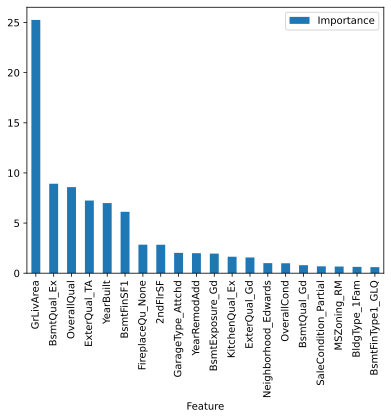

In [44]:
feature_importance = pd.DataFrame(
    {"Feature": test.columns, "Importance": model.feature_importances_}
).sort_values("Importance", ascending=False)

feature_importance[:20].plot(kind="bar", x="Feature", y="Importance")

In [45]:
submission = pd.DataFrame({"Id": test_orig["Id"], "SalePrice": y_pred})
submission

,Id,SalePrice
0,1461,119138.944828
1,1462,160871.385015
2,1463,185725.410394
3,1464,193627.747142
4,1465,185929.587082
...,...,...
1454,2915,79072.590491
1455,2916,78457.155249
1456,2917,147950.489638
1457,2918,121098.473818


In [46]:
for i in range(len(y_pred)):
    print(f"Predicted: {y_pred[i]:,.2f}, Actual: {y_test.iloc[i]:,.2f}")

Predicted: 119,138.94, Actual: 279,500.00
Predicted: 160,871.39, Actual: 157,000.00
Predicted: 185,725.41, Actual: 325,300.00
Predicted: 193,627.75, Actual: 139,400.00
Predicted: 185,929.59, Actual: 277,500.00
Predicted: 175,432.84, Actual: 160,000.00
Predicted: 172,965.00, Actual: 219,500.00
Predicted: 164,146.14, Actual: 164,500.00
Predicted: 189,440.53, Actual: 98,600.00
Predicted: 126,030.20, Actual: 185,000.00
Predicted: 190,738.50, Actual: 83,000.00
Predicted: 96,234.94, Actual: 100,000.00
Predicted: 101,894.07, Actual: 226,000.00
Predicted: 153,936.43, Actual: 180,000.00
Predicted: 126,809.61, Actual: 412,500.00
Predicted: 381,832.75, Actual: 190,000.00
Predicted: 252,677.38, Actual: 135,000.00
Predicted: 275,419.35, Actual: 286,000.00
Predicted: 283,840.93, Actual: 140,000.00
Predicted: 463,232.36, Actual: 171,500.00
Predicted: 293,261.55, Actual: 180,500.00
Predicted: 212,641.02, Actual: 143,900.00
Predicted: 171,688.65, Actual: 210,000.00
Predicted: 166,027.54, Actual: 148,00

IndexError: single positional indexer is out-of-bounds

In [ ]:
np.log(list(y_pred))

In [ ]:
r2s

In [ ]:
_anom_indices

In [ ]:
# turn it into a dataframe
pd.DataFrame(np.abs(model.coef_), index=_X.columns).sort_values(0)

In [ ]:
# show correlation to target
_X.corrwith(y).sort_values()

In [ ]:
# run a histogram for each feature in _X.loc[_anom_trains[9]]

_X.loc[_anom_trains[9]].hist()

# set layout to be compact
plt.tight_layout()

In [ ]:
tsts = pd.concat([X.loc[_anom_trains[43]], y.loc[_anom_trains[43]]], axis=1)
tsts.plot.scatter(x=0, y=1)
tsts.query("standardscaler__OverallQualXLotArea > 6")

In [ ]:
_X

In [ ]:
_X.loc[523, ["OverallQual", "LotArea", "GrLivArea"]]

In [ ]:
trs = pd.concat([X.loc[_anom_trains[3]], y.loc[_anom_trains[3]]], axis=1).sort_values(
    "SalePrice"
)

trs.plot.scatter(x=0, y="SalePrice")